### Plant Pathology 2020 Kaggle 경연대회

In [1]:
import numpy as np 
import pandas as pd 
import os

test_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv")
train_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv")

In [2]:
train_df.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [3]:
test_df.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [4]:
train_df.shape, test_df.shape

((1821, 5), (1821, 1))

### 이미지의 절대 경로를 DataFrame에 추가하고, 개별 컬럼별 0/1 값을 구분하여 클래스 라벨로 생성.

In [5]:
pd.set_option("max_colwidth", 100)

IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
train_df['path'] = IMAGE_DIR + '/' + train_df['image_id'] + '.jpg'
train_df.head()

image_id  healthy  multiple_diseases  rust  scab  \
0  Train_0        0                  0     0     1   
1  Train_1        0                  1     0     0   
2  Train_2        1                  0     0     0   
3  Train_3        0                  0     1     0   
4  Train_4        1                  0     0     0   

                                                          path  
0  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg  
1  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg  
2  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg  
3  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg  
4  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg

In [6]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    elif x['rust'] == 1:
        return 'rust'
    elif x['scab'] == 1:
        return 'scab'
    else: return 'None'

train_df['label'] = train_df.apply(lambda x:get_label(x), axis=1)
train_df.head()

image_id  healthy  multiple_diseases  rust  scab  \
0  Train_0        0                  0     0     1   
1  Train_1        0                  1     0     0   
2  Train_2        1                  0     0     0   
3  Train_3        0                  0     1     0   
4  Train_4        1                  0     0     0   

                                                          path  \
0  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg   
1  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg   
2  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg   
3  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg   
4  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg   

               label  
0               scab  
1  multiple_diseases  
2            healthy  
3               rust  
4            healthy

In [7]:
## 학습 이미지 건수 및 label별 건수
print('train shape:', train_df.shape)
print('label 별 건수')
train_df['label'].value_counts()

train shape: (1821, 7)
label 별 건수


label
rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: count, dtype: int64

In [8]:
# label명을 target값으로 매핑
label_mapping = {'healthy':0, 'multiple_diseases':1, 'rust':2, 'scab':3 }
train_df['target'] = train_df['label'].map(label_mapping)

train_df.head()

image_id  healthy  multiple_diseases  rust  scab  \
0  Train_0        0                  0     0     1   
1  Train_1        0                  1     0     0   
2  Train_2        1                  0     0     0   
3  Train_3        0                  0     1     0   
4  Train_4        1                  0     0     0   

                                                          path  \
0  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg   
1  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg   
2  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg   
3  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg   
4  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg   

               label  target  
0               scab       3  
1  multiple_diseases       1  
2            healthy       0  
3               rust       2  
4            healthy       0

In [9]:
train_df['target'].value_counts()

target
2    622
3    592
0    516
1     91
Name: count, dtype: int64

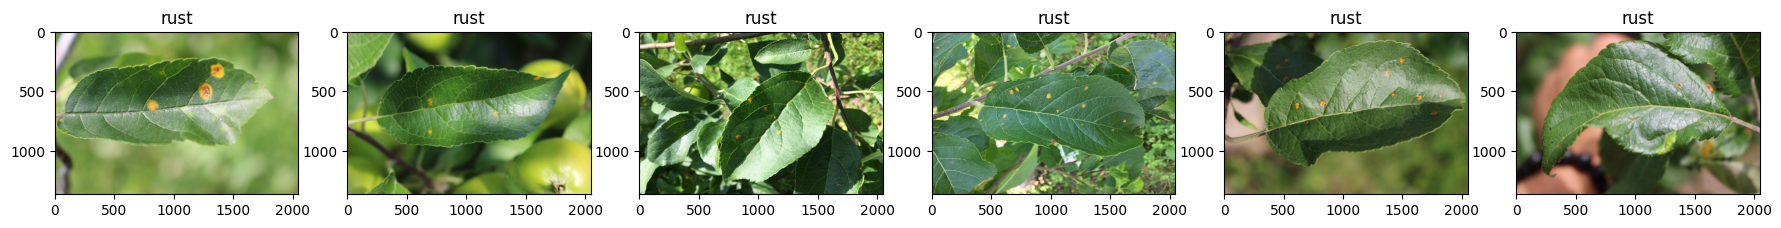

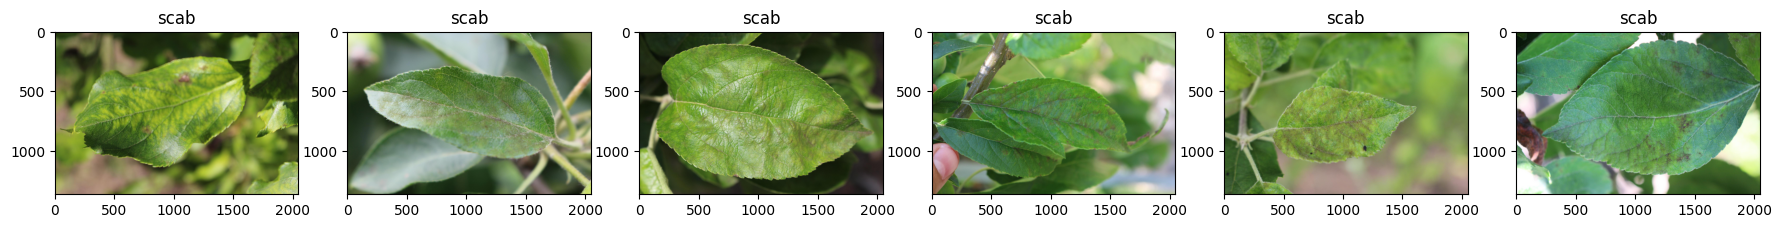

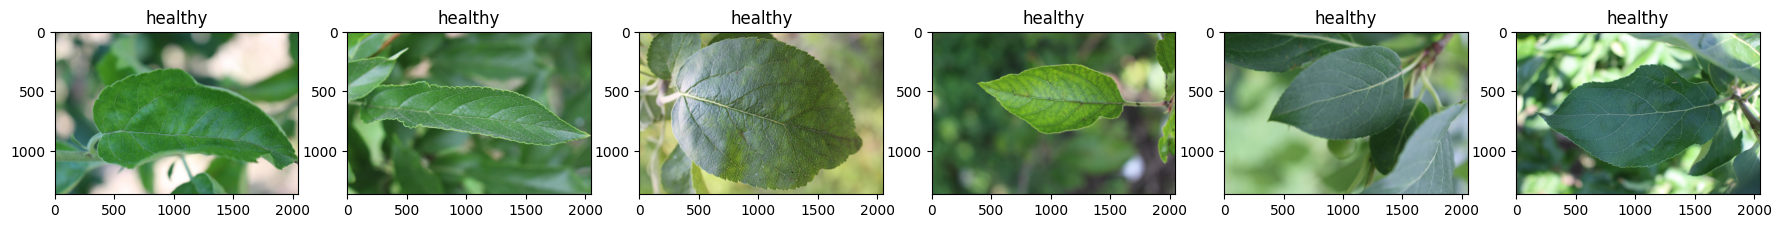

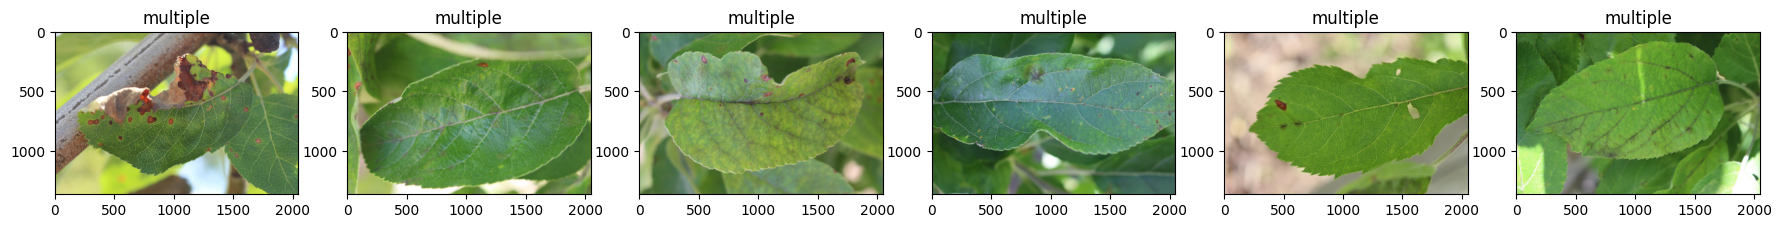

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 

def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].set_title(title)

        
rust_image_list = train_df[train_df['label']=='rust']['path'].iloc[:6].tolist()
scab_image_list = train_df[train_df['label']=='scab']['path'].iloc[:6].tolist()
healthy_image_list = train_df[train_df['label']=='healthy']['path'].iloc[:6].tolist()
multiple_image_list = train_df[train_df['label']=='multiple_diseases']['path'].iloc[:6].tolist()

show_grid_images(rust_image_list, ncols=6, title='rust')
show_grid_images(scab_image_list, ncols=6, title='scab')
show_grid_images(healthy_image_list, ncols=6, title='healthy')
show_grid_images(multiple_image_list, ncols=6, title='multiple')

### 이미지 Augmentation 적용. 
* cutout과 같은 noise는 나뭇잎의 병균 반점과 헷갈릴 수 있으므로 사용하지 않음. 
* 전체 이미지가 파란색 계열이고 병균 반점이 특정 색깔을 가지고 있으므로 색상의 변화는 적용하지 않음. 
* 전반적으로 판별하려는 나뭇잎이 전체 이미지의 중앙에 와있음. crop또는 scale등의 적용 고려. 

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


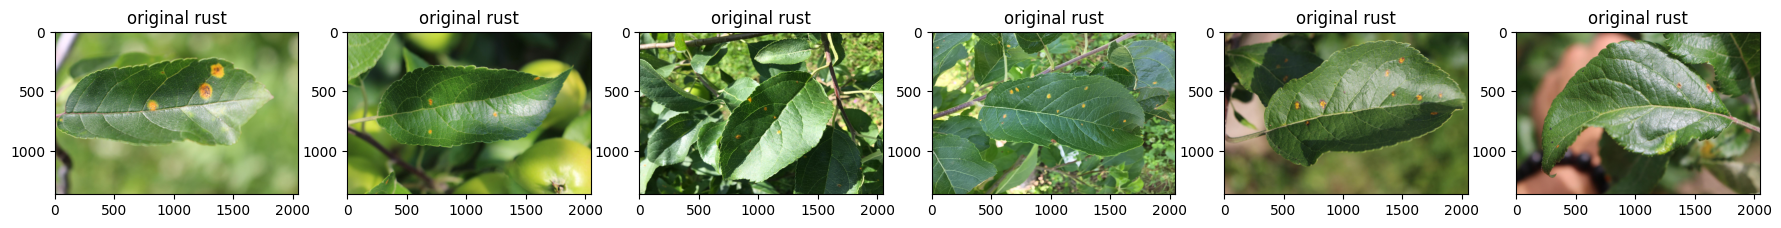

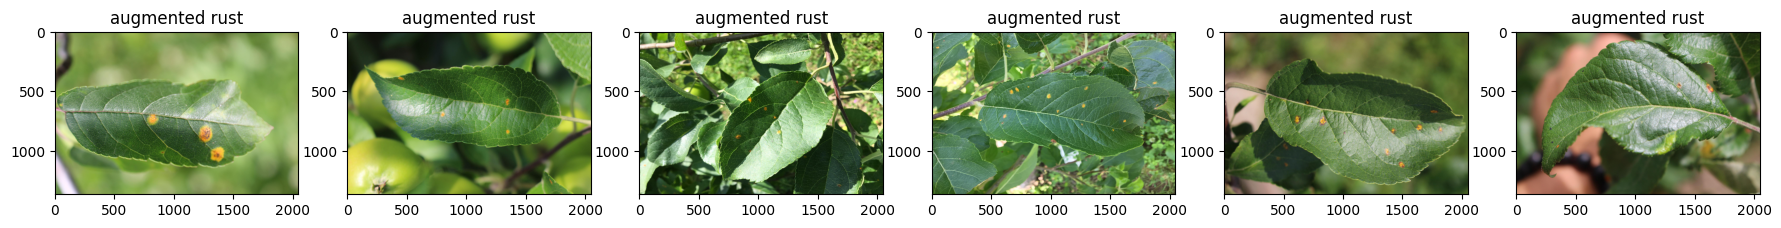

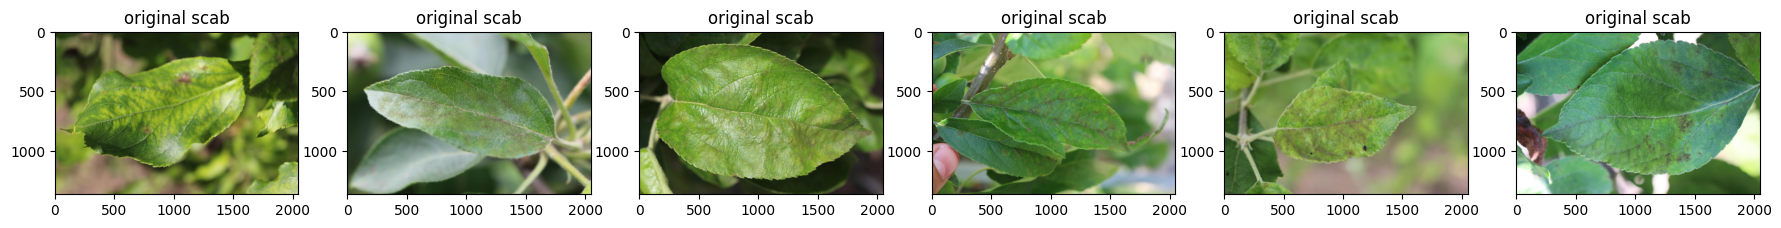

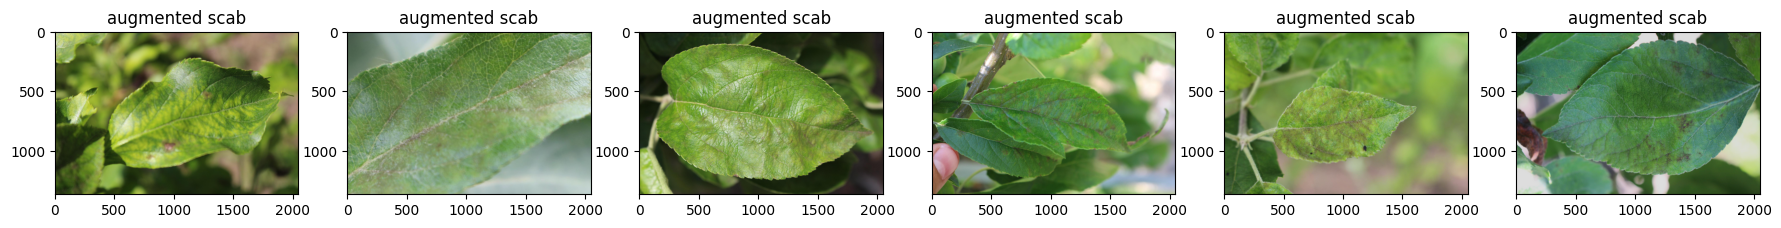

In [11]:
import albumentations as A

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.2, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
])

show_grid_images(rust_image_list, augmentor=None, ncols=6, title='original rust')
show_grid_images(rust_image_list, augmentor=augmentor_01, ncols=6, title='augmented rust')

show_grid_images(scab_image_list, augmentor=None, ncols=6, title='original scab')
show_grid_images(scab_image_list, augmentor=augmentor_01, ncols=6, title='augmented scab')

### Custom Dataset과 DataLoader 생성. 
* Kaggle의 테스트용 Dataset은 target값이 없으므로 image 배치만 반환할 수 있도록 적용필요
* 처음에는 학습 데이터를 다시 학습과 검증용 Dataset으로 분리하지만, 추후에는 검증용 데이터를 사용하지 않고 모두 학습용 데이터로 사용 

In [28]:
from sklearn.model_selection import train_test_split

tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['target'], random_state=2025)
tr_df.shape, val_df.shape

((1456, 8), (365, 8))

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image

class PlantDataset(Dataset):
    # 이미지 파일리스트, 타겟 파일리스트, transforms 등 이미지와 타겟 데이터 가공에 필요한 인자들을 입력 받음
    def __init__(self, image_paths, targets=None, transform=None):
        self.image_paths = image_paths
        self.targets = targets
        self.transform = transform
    
    # 전체 건수를 반환
    def __len__(self):
        return len(self.image_paths)
        
    # idx로 지정된 하나의 image, label을 tensor 형태로 반환
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        # cv2로 image 로딩. 
        image_np = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB).astype(np.float32)
        # 보통은 transform이 None이 되는 경우는 거의 없음(Tensor 변환이라도 있음)
        image = self.transform(image=image_np)['image']

        if self.targets is not None:
            # 개별 target값을 tensor로 변환.
            target = torch.tensor(self.targets[idx])
            return image, target
        # 테스트 데이터의 경우 targets가 입력 되지 않을 수 있으므로 이를 대비. 
        else:
            # return image, None이 아니라 image만 반환. default collate_fn()은 None을 입력 받으면 오류 발생. 
            return image

In [30]:
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CFG:
    batch_size = 16
    image_size = 240

# 이미지가 크므로 HorizontalFlip을 적용하기 전에 Resize를 먼저 적용하여 작게 만든 뒤 적용(모델 성능을 살짝 떨어질 수 있음) 
tr_transform_01 = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size, p=1),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

#기존 함수에서 검증용 DataLoader는 생성하지 않을 수 있도록 로직 변경. 
def create_tr_val_loader(tr_df, val_df, tr_transform, val_transform):
    tr_dataset = PlantDataset(image_paths=tr_df['path'].to_list(), 
                               targets=tr_df['target'].to_list(), transform=tr_transform)
    tr_loader = DataLoader(tr_dataset, batch_size=CFG.batch_size, shuffle=True, num_workers=4, pin_memory=True)
    # 추후에 validation용 Dataset를 만들지 않고, 기존 검증용 이미지를 학습용 이미지로 다 사용할 수 있음. 
    if val_df is not None:
        val_dataset = PlantDataset(image_paths=val_df['path'].to_list(), 
                                   targets=val_df['target'].to_list(), transform=val_transform)
        val_loader = DataLoader(val_dataset, batch_size=4*CFG.batch_size, shuffle=False, num_workers=4, pin_memory=True)

        return tr_loader, val_loader

    return tr_loader, None

tr_loader, val_loader = create_tr_val_loader(tr_df=tr_df, val_df=val_df, 
                                             tr_transform=tr_transform_01, val_transform=val_transform)
images, labels = next(iter(tr_loader))
print(images.shape, labels.shape)


torch.Size([16, 3, 240, 240]) torch.Size([16])


In [31]:
# val_df가 입력되지 않을 수 있음. 
tr_loader, val_loader = create_tr_val_loader(tr_df=train_df, val_df=None, 
                                 tr_transform=tr_transform_01, val_transform=None)
images, labels = next(iter(tr_loader))
print(images.shape, labels.shape, val_loader)

torch.Size([16, 3, 240, 240]) torch.Size([16]) None


In [32]:
# Kaggle 테스트 데이터 세트로 예측 시 target값 입력은 없고, image id와 파일경로만 존재. 
IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'

test_image_paths = test_df['path'].to_list()

CFG.image_size = 240

test_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])
# test용 Dataset은 targets가 입력되지 않음. 
test_dataset = PlantDataset(image_paths=test_image_paths, 
                            targets=None, transform=test_transform)

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

# test_loader는 batch단위 image들만 반환. target값 반환 없음. 
images = next(iter(test_loader))
print(images.shape)

torch.Size([64, 3, 240, 240])


#### torchvision EfficientNet 계열 모델 생성

In [33]:
import torch
import torch.nn as nn
from torchvision import models

def create_tv_model(model_name, num_classes=1000, weights='DEFAULT'):
    model = None
    if model_name == 'efficientnet_v2_s':
        model = models.efficientnet_v2_s(weights=weights)
        model.classifier = nn.Sequential(nn.Dropout(p=0.2),
                                         nn.Linear(in_features=1280, out_features=num_classes))
    elif model_name == 'efficientnet_b4':
        model = models.efficientnet_b4(weights=weights)
        model.classifier = nn.Sequential(nn.Dropout(p=0.2),
                                         nn.Linear(in_features=1792, out_features=num_classes))
    elif model_name == 'efficientnet_b1':
        model = models.efficientnet_b1(weights=weights)
        model.classifier = nn.Sequential(nn.Dropout(p=0.2),
                                         nn.Linear(in_features=1280, out_features=num_classes))
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(weights=weights)
        model.classifier = nn.Sequential(nn.Dropout(p=0.2),
                                         nn.Linear(in_features=1280, out_features=num_classes))
    elif model_name == 'resnet101':
        model = models.resnet101(weights='DEFAULT')
        model.fc = nn.Linear(in_features=2048, out_features=num_classes)

    return model

### Trainer 클래스로 학습하기 - torchmetrics를 이용하여 ROC AUC를 구할 수 있도록 클래스 수정. 
* 기존 정확도를 구하는 로직을 torchmetrics의 AUROC 클래스를 이용하여 ROC AUC를 구할 수 있도록 수정.
* AUROC는 예측 입력 값으로 예측 확률값을 입력 받아야 함(model의 출력 결과에 F.softmax() 적용 필요) 

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os

class TrainerWithTM:
    def __init__(self, model, loss_fn, optimizer, train_loader, val_loader,
                 scheduler=None, callbacks=None, metric=None, device=None):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        # scheduler 추가
        self.scheduler = scheduler
        self.device = device
        # 현재 learning rate 변수 추가
        self.current_lr = self.optimizer.param_groups[0]['lr']
        #checkpoint와 early stopping 클래스들을 list로 받음. 
        self.callbacks = callbacks
        # metric 추가
        self.metric = metric.to(device)
        
    def train_epoch(self, epoch):
        self.model.train()

        # running 평균 loss 계산.
        accu_loss = 0.0
        running_avg_loss = 0.0
        # metric 초기화
        self.metric.reset()
        # tqdm으로 실시간 training loop 진행 상황 시각화
        with tqdm(total=len(self.train_loader), desc=f"Epoch {epoch+1} [Training..]", leave=True) as progress_bar:
            for batch_idx, (inputs, targets) in enumerate(self.train_loader):
                # 반드시 to(self.device). to(device) 아님.
                inputs = inputs.to(self.device)
                targets = targets.to(self.device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)

                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                # batch 반복 시 마다 누적  loss를 구하고 이를 batch 횟수로 나눠서 running 평균 loss 구함.
                accu_loss += loss.item()
                running_avg_loss = accu_loss /(batch_idx + 1)
                
                # torchmetrics의 AUROC 클래스는 pred 예측 값으로 예측 확률값이 입력되어야 함.
                pred_proba = F.softmax(outputs, dim=-1)
                self.metric.update(pred_proba, targets)

                #tqdm progress_bar에 진행 상황 및 running 평균 loss와 정확도 표시
                progress_bar.update(1)
                if batch_idx % 20 == 0 or (batch_idx + 1) == progress_bar.total:  # 20 batch 횟수마다 또는 맨 마지막 batch에서 update
                    progress_bar.set_postfix({"Loss": running_avg_loss,
                                              "AUC": self.metric.compute().item()})

        if (self.scheduler is not None) and (not isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau)):
            self.scheduler.step()
            self.current_lr = self.scheduler.get_last_lr()[0]
        
        return running_avg_loss, self.metric.compute().item()

    def validate_epoch(self, epoch):
        if not self.val_loader:
            # tuple 형태로 None, None 반환하도록 수정. 
            return None, None

        self.model.eval()

        # running 평균 loss 계산.
        accu_loss = 0
        running_avg_loss = 0
        current_lr = self.optimizer.param_groups[0]['lr']
        # metric 초기화
        self.metric.reset()
        with tqdm(total=len(self.val_loader), desc=f"Epoch {epoch+1} [Validating]", leave=True) as progress_bar:
            with torch.no_grad():
                for batch_idx, (inputs, targets) in enumerate(self.val_loader):
                    inputs = inputs.to(self.device)
                    targets = targets.to(self.device)

                    outputs = self.model(inputs)

                    loss = self.loss_fn(outputs, targets)
                    # batch 반복 시 마다 누적  loss를 구하고 이를 batch 횟수로 나눠서 running 평균 loss 구함.
                    accu_loss += loss.item()
                    running_avg_loss = accu_loss /(batch_idx + 1)
                    
                    # torchmetrics의 AUROC 클래스는 pred 예측 값으로 예측 확률값이 입력되어야 함.
                    pred_proba = F.softmax(outputs, dim=-1)
                    self.metric.update(pred_proba, targets)
                    
                    #tqdm progress_bar에 진행 상황 및 running 평균 loss와 정확도 표시
                    progress_bar.update(1)
                    if batch_idx % 20 == 0 or (batch_idx + 1) == progress_bar.total:  # 20 batch 횟수마다 또는 맨 마지막 batch에서 update
                        progress_bar.set_postfix({"Loss": running_avg_loss,
                                                  "AUC": self.metric.compute().item()})
        # scheduler에 검증 데이터 기반에서 epoch레벨로 계산된 loss를 입력해줌.
        if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            self.scheduler.step(running_avg_loss)
            self.current_lr = self.scheduler.get_last_lr()[0]

        return running_avg_loss, self.metric.compute().item()

    def fit(self, epochs):
        # epoch 시마다 학습/검증 결과를 기록하는 history dict 생성. learning rate 추가
        history = {'train_loss': [], 'train_metric': [], 'val_loss': [], 'val_metric': [], 'lr': []}
        for epoch in range(epochs):
            train_loss, train_metric = self.train_epoch(epoch)
            val_loss, val_metric = self.validate_epoch(epoch)
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f} Train Auc: {train_metric:.4f}",
                  f", Val Loss: {val_loss:.4f} Val Auc: {val_metric:.4f}" if val_loss is not None else "",
                  f", Current lr:{self.current_lr:.6f}")
            # epoch 시마다 학습/검증 결과를 기록. learning rate 추가
            history['train_loss'].append(train_loss); history['train_metric'].append(train_metric)
            history['val_loss'].append(val_loss); history['val_metric'].append(val_metric)
            history['lr'].append(self.current_lr)

            # 만약 callbacks가 생성 인자로 들어온 다면 아래 수행. 만약 early stop 되어야 하면 is_epoch_loop_break로 for loop break
            if self.callbacks:
                is_epoch_loop_break = self._execute_callbacks(self.callbacks, self.model, epoch, val_loss, val_metric)
                if is_epoch_loop_break:
                    break
                                
        return history

    # 생성 인자로 들어온 callbacks list을 하나씩 꺼내서 ModelCheckpoint, EarlyStopping을 수행. 
    # EarlyStopping 호출 시 early stop 여부를 판단하는 is_early_stopped 반환
    def _execute_callbacks(self, callbacks, model, epoch, val_loss, val_metric):
        is_early_stopped = False
        
        for callback in self.callbacks:
            if isinstance(callback, ModelCheckpoint):
                if callback.monitor == 'val_loss':    
                    callback.save(model, epoch, val_loss)
                elif callback.monitor == 'val_metric':
                    callback.save(model, epoch, val_metric)
            if isinstance(callback, EarlyStopping):
                if callback.monitor == 'val_loss':
                    is_early_stopped = callback.check_early_stop(val_loss)
                if callback.monitor == 'val_metric':
                    is_early_stopped = callback.check_early_stop(val_metric)
                
        return is_early_stopped

    # 학습이 완료된 모델을 return
    def get_trained_model(self):
        return self.model

In [21]:
# /kaggle/working/modular/v1 디렉토리에 utils.py 파일 다운로드
!rm -rf ./modular/v1
!mkdir -p ./modular/v1
!wget -O ./modular/v1/utils.py https://raw.githubusercontent.com/chulminkw/CNN_PG_Torch/main/modular/v1/utils.py?raw=true
!ls ./modular/v1

import sys

# 반드시 system path를 아래와 같이 잡아줘야 함. 
sys.path.append('/kaggle/working')

# utils.py에 있는 Predictor 클래스를 이용. Predictor 객체의 predict_proba() 메소드로 예측 확률을 구함. 
from modular.v1.utils import ModelCheckpoint, EarlyStopping, Predictor

--2025-02-06 06:53:51--  https://raw.githubusercontent.com/chulminkw/CNN_PG_Torch/main/modular/v1/utils.py?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13594 (13K) [text/plain]
Saving to: ‘./modular/v1/utils.py’

./modular/v1/utils. 100%[===================>]  13.28K  --.-KB/s    in 0s      

2025-02-06 06:53:51 (28.6 MB/s) - ‘./modular/v1/utils.py’ saved [13594/13594]

utils.py


In [22]:
eff_b1_model = create_tv_model('efficientnet_b1', num_classes=4)

#### train 을 수행하는 함수 생성. 
* model, 학습/검증용 메타 DataFrame, 학습/검증용 transform(augmentor), 성능 metric, learning_rate, scheduler, callbacks, epochs등을 인자로 방아 TraninerWithCM 을 수행하는 함수 선언 

In [35]:
from torch.optim import Adam
import torch.optim as optim

# 추후에 여러 Learning rate scheduler 테스트를 위해서 함수화
def get_reduce_lr_scheduer(optimizer):
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', 
                                    factor=0.2, patience=3, threshold=0.01, min_lr=1e-7)
    return lr_scheduler

# 검증용 dataframe이 입력되지 않을 수 있는 경우를 감안하여 함수 수정. tr_df, val_df 및 metric도 인자로 받음. 
# learning rate scheduler의 경우 해당 scheduler를 반환하는 함수를 인자로 받을 수 있게 수정. 
def train_plant(model, tr_df, val_df, tr_transform, val_transform, metric=None, 
                learning_rate=1e-3, lr_scheduler_fn=None, 
                callbacks=None, epochs=30):
    # 학습, 검증용 DataLoader 생성. val_df가 None이 입력 될 수 있음. 
    tr_loader, val_loader = create_tr_val_loader(tr_df=tr_df, val_df=val_df,
                                                 tr_transform=tr_transform, val_transform=val_transform)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer = Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    #lr_scheduler_fn으로 입력된 함수에 optimizer를 입력하여 scheduler를 return 받음. 
    scheduler = lr_scheduler_fn(optimizer)
    
    # roc auc metric처리가 된 TrainerWithTM 생성하여 학습 수행. 
    trainer = TrainerWithTM(model=model, loss_fn=loss_fn, optimizer=optimizer,
                   train_loader=tr_loader, val_loader=val_loader, scheduler=scheduler, callbacks=callbacks,
                   metric=metric, device=device)
    history = trainer.fit(epochs)

    return trainer, history

In [37]:
from torchmetrics.classification import AUROC, Accuracy

# ROC AUC 측정을 위한 AUROC 객체 생성. 
auc_metric = AUROC(task="multiclass", num_classes=4)

# lr_scheduler_fn에 인자로 들어갈 learning rate scheduler 함수
def get_reduce_lr_scheduer(optimizer):
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', 
                                    factor=0.2, patience=3, threshold=0.01, min_lr=1e-7)
    return lr_scheduler
    
# 검증 ROCAUC 기반의 ModelChecpoint 적용. 
model_checkpoint = ModelCheckpoint('/kaggle/working/checkpoints', monitor='val_metric', mode='max')
eff_b1_model = create_tv_model('efficientnet_b1', num_classes=4)

# 초기 learning rate는 1e-3, 
trainer_effb1_01, history = train_plant(eff_b1_model, tr_df=tr_df, val_df=val_df,
                                  tr_transform=tr_transform_01, val_transform=val_transform,
                                  metric=auc_metric, learning_rate=1e-3, 
                                  lr_scheduler_fn=get_reduce_lr_scheduer, callbacks=[model_checkpoint], 
                                  epochs=30)

Epoch 1 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.254, AUC=0.958]


Epoch 1/30, Train Loss: 0.4574 Train Auc: 0.9226 , Val Loss: 0.2536 Val Auc: 0.9576 , Current lr:0.001000
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_1_val_metric_0.9576.pt


Epoch 2 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s, Loss=0.214, AUC=0.984] 


Epoch 2/30, Train Loss: 0.2362 Train Auc: 0.9724 , Val Loss: 0.2143 Val Auc: 0.9839 , Current lr:0.001000
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_2_val_metric_0.9839.pt


Epoch 3 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s, Loss=0.221, AUC=0.967]


Epoch 3/30, Train Loss: 0.2105 Train Auc: 0.9758 , Val Loss: 0.2209 Val Auc: 0.9671 , Current lr:0.001000


Epoch 4 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.61it/s, Loss=0.2, AUC=0.976]   


Epoch 4/30, Train Loss: 0.1261 Train Auc: 0.9893 , Val Loss: 0.2000 Val Auc: 0.9763 , Current lr:0.001000


Epoch 5 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s, Loss=0.152, AUC=0.987]


Epoch 5/30, Train Loss: 0.1098 Train Auc: 0.9946 , Val Loss: 0.1523 Val Auc: 0.9870 , Current lr:0.001000
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_5_val_metric_0.9870.pt


Epoch 6 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s, Loss=0.266, AUC=0.965] 


Epoch 6/30, Train Loss: 0.0897 Train Auc: 0.9921 , Val Loss: 0.2663 Val Auc: 0.9649 , Current lr:0.001000


Epoch 7 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s, Loss=0.169, AUC=0.98]  


Epoch 7/30, Train Loss: 0.0971 Train Auc: 0.9933 , Val Loss: 0.1688 Val Auc: 0.9805 , Current lr:0.001000


Epoch 8 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.224, AUC=0.974] 


Epoch 8/30, Train Loss: 0.0565 Train Auc: 0.9985 , Val Loss: 0.2238 Val Auc: 0.9738 , Current lr:0.001000


Epoch 9 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.61it/s, Loss=0.252, AUC=0.969]


Epoch 9/30, Train Loss: 0.0504 Train Auc: 0.9986 , Val Loss: 0.2524 Val Auc: 0.9690 , Current lr:0.000200


Epoch 10 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s, Loss=0.186, AUC=0.984] 


Epoch 10/30, Train Loss: 0.0261 Train Auc: 0.9994 , Val Loss: 0.1858 Val Auc: 0.9841 , Current lr:0.000200


Epoch 11 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s, Loss=0.195, AUC=0.982] 


Epoch 11/30, Train Loss: 0.0123 Train Auc: 1.0000 , Val Loss: 0.1949 Val Auc: 0.9819 , Current lr:0.000200


Epoch 12 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s, Loss=0.167, AUC=0.984] 


Epoch 12/30, Train Loss: 0.0086 Train Auc: 1.0000 , Val Loss: 0.1666 Val Auc: 0.9844 , Current lr:0.000200


Epoch 13 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.181, AUC=0.983]


Epoch 13/30, Train Loss: 0.0189 Train Auc: 0.9995 , Val Loss: 0.1806 Val Auc: 0.9828 , Current lr:0.000040


Epoch 14 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.179, AUC=0.983] 


Epoch 14/30, Train Loss: 0.0099 Train Auc: 1.0000 , Val Loss: 0.1790 Val Auc: 0.9825 , Current lr:0.000040


Epoch 15 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s, Loss=0.174, AUC=0.982] 


Epoch 15/30, Train Loss: 0.0176 Train Auc: 0.9984 , Val Loss: 0.1735 Val Auc: 0.9822 , Current lr:0.000040


Epoch 16 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Loss=0.178, AUC=0.982] 


Epoch 16/30, Train Loss: 0.0126 Train Auc: 1.0000 , Val Loss: 0.1778 Val Auc: 0.9816 , Current lr:0.000040


Epoch 17 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s, Loss=0.19, AUC=0.98]   


Epoch 17/30, Train Loss: 0.0085 Train Auc: 1.0000 , Val Loss: 0.1901 Val Auc: 0.9804 , Current lr:0.000008


Epoch 18 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s, Loss=0.183, AUC=0.981] 


Epoch 18/30, Train Loss: 0.0090 Train Auc: 1.0000 , Val Loss: 0.1829 Val Auc: 0.9814 , Current lr:0.000008


Epoch 19 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s, Loss=0.183, AUC=0.981] 


Epoch 19/30, Train Loss: 0.0086 Train Auc: 1.0000 , Val Loss: 0.1830 Val Auc: 0.9811 , Current lr:0.000008


Epoch 20 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.61it/s, Loss=0.188, AUC=0.981] 


Epoch 20/30, Train Loss: 0.0117 Train Auc: 0.9999 , Val Loss: 0.1882 Val Auc: 0.9813 , Current lr:0.000008


Epoch 21 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.173, AUC=0.982] 


Epoch 21/30, Train Loss: 0.0050 Train Auc: 1.0000 , Val Loss: 0.1735 Val Auc: 0.9820 , Current lr:0.000002


Epoch 22 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s, Loss=0.191, AUC=0.981] 


Epoch 22/30, Train Loss: 0.0094 Train Auc: 0.9999 , Val Loss: 0.1906 Val Auc: 0.9814 , Current lr:0.000002


Epoch 23 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s, Loss=0.177, AUC=0.982] 


Epoch 23/30, Train Loss: 0.0039 Train Auc: 1.0000 , Val Loss: 0.1773 Val Auc: 0.9822 , Current lr:0.000002


Epoch 24 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s, Loss=0.169, AUC=0.983] 


Epoch 24/30, Train Loss: 0.0088 Train Auc: 1.0000 , Val Loss: 0.1687 Val Auc: 0.9833 , Current lr:0.000002


Epoch 25 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.175, AUC=0.981] 


Epoch 25/30, Train Loss: 0.0044 Train Auc: 1.0000 , Val Loss: 0.1747 Val Auc: 0.9814 , Current lr:0.000000


Epoch 26 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s, Loss=0.198, AUC=0.98] 


Epoch 26/30, Train Loss: 0.0126 Train Auc: 1.0000 , Val Loss: 0.1976 Val Auc: 0.9801 , Current lr:0.000000


Epoch 27 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s, Loss=0.177, AUC=0.982] 


Epoch 27/30, Train Loss: 0.0106 Train Auc: 1.0000 , Val Loss: 0.1773 Val Auc: 0.9817 , Current lr:0.000000


Epoch 28 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s, Loss=0.189, AUC=0.98]  


Epoch 28/30, Train Loss: 0.0031 Train Auc: 1.0000 , Val Loss: 0.1894 Val Auc: 0.9799 , Current lr:0.000000


Epoch 29 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s, Loss=0.187, AUC=0.982] 


Epoch 29/30, Train Loss: 0.0099 Train Auc: 1.0000 , Val Loss: 0.1870 Val Auc: 0.9816 , Current lr:0.000000


Epoch 30 [Validating]: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s, Loss=0.182, AUC=0.982] 

Epoch 30/30, Train Loss: 0.0089 Train Auc: 1.0000 , Val Loss: 0.1815 Val Auc: 0.9816 , Current lr:0.000000


### 테스트 데이터로 Plant의 질병을 예측하고 캐글에 제출할 submit csv 파일 만들기
* 테스트용 DataFrame에 이미지 경로 추가. 
* 테스트용 Dataset 생성. label은 테스트 데이터에서 알 수 없으므로 None으로 입력

In [38]:
test_df.head()

image_id                                                        path
0   Test_0  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_0.jpg
1   Test_1  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_1.jpg
2   Test_2  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_2.jpg
3   Test_3  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_3.jpg
4   Test_4  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_4.jpg

In [ ]:
# IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
# test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'
# test_df.head()

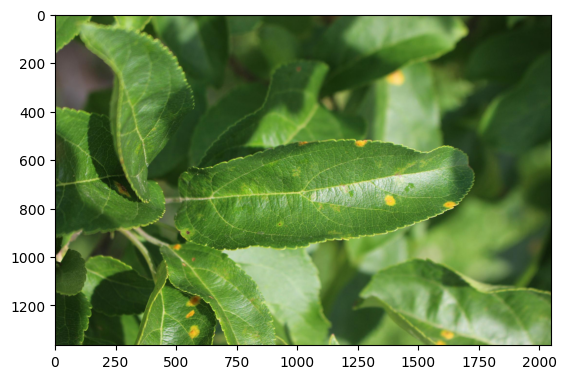

In [42]:
import matplotlib.pyplot as plt
import cv2

image_np = cv2.cvtColor(cv2.imread('/kaggle/input/plant-pathology-2020-fgvc7/images/Test_0.jpg'), 
                        cv2.COLOR_BGR2RGB)
plt.imshow(image_np)
plt.show()

### Test용 데이터를 Predictor로 예측
* 테스트 데이터로 예측한 결과를 csv파일 형태로 만들어서 kaggle에 제출
* 예측 결과는 ROC-AUC로 평가되므로 'healthy', 'multiple_diseases', 'rust', 'scab' 순서로 예측 확률을 적용하여 csv파일로 생성
* Predictor 클래스는 실습 github의 util.py에서 import

In [43]:
test_image_paths = test_df['path'].to_list()

CFG.image_size = 240

test_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])
# targets는 None
test_dataset = PlantDataset(image_paths=test_image_paths, 
                            targets=None, transform=test_transform)

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

images = next(iter(test_loader))
print(images.shape)
# 아래는 image tensor만 반환함. target값 없음. 
# print(test_dataset[0])

torch.Size([64, 3, 240, 240])


In [41]:
# 모든 테스트 데이터에 대해서 예측 수행 후 numpy로 반환 
def get_all_proba(predictor, test_loader):
    proba_all_list = []
    
    for images in test_loader:
        probas = predictor.predict_proba(images).cpu().numpy()
        # 개별 원소값으로 저장해야 하므로 append()가 아니라 extend()로 list에 저장. 
        proba_all_list.extend(probas)

    proba_all = np.array(proba_all_list)

    return proba_all

In [44]:
# 가장 검증 성능이 좋은 weight 파일을 모델로 로딩. 
state_dict = torch.load('/kaggle/working/checkpoints/checkpoint_epoch_5_val_metric_0.9870.pt', weights_only=True)
best_trained_model = create_tv_model('efficientnet_b1', num_classes=4, weights=None)
best_trained_model.load_state_dict(state_dict)

<All keys matched successfully>

In [45]:
# best_trained_model = trainer_effb1_01.get_trained_model()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predictor = Predictor(model=best_trained_model, device=device)

proba_all = get_all_proba(predictor, test_loader)

In [48]:
proba_all[:4]

array([[8.1747462e-04, 9.3835192e-03, 9.8863095e-01, 1.1680797e-03],
       [2.3802811e-05, 4.3231307e-04, 9.9941969e-01, 1.2422104e-04],
       [1.6109409e-09, 4.7037893e-06, 5.1456222e-08, 9.9999535e-01],
       [9.9968314e-01, 1.4818360e-05, 9.7299664e-05, 2.0476495e-04]],
      dtype=float32)

In [46]:
proba_all.shape

(1821, 4)

In [49]:
# 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성. 
preds_df = pd.DataFrame(proba_all)
preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
# 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
submit_df.head()

image_id       healthy  multiple_diseases          rust      scab
0   Test_0  8.174746e-04           0.009384  9.886310e-01  0.001168
1   Test_1  2.380281e-05           0.000432  9.994197e-01  0.000124
2   Test_2  1.610941e-09           0.000005  5.145622e-08  0.999995
3   Test_3  9.996831e-01           0.000015  9.729966e-05  0.000205
4   Test_4  3.835766e-06           0.000093  9.998956e-01  0.000007

In [51]:
def make_submit_df(best_trained_model, test_loader):
    # 학습된 모델을 기반으로 Predictor객체로 모든 테스트용 이미지의 클래스 예측
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    predictor = Predictor(model=best_trained_model, device=device)
    proba_all = get_all_proba(predictor, test_loader)

    # 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성. 
    preds_df = pd.DataFrame(proba_all)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    # 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
    submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)

    return submit_df

In [52]:
# best_trained_model = trainer_effb1_01.get_trained_model()
submit_df = make_submit_df(best_trained_model, test_loader)
submit_df.head()

image_id       healthy  multiple_diseases          rust      scab
0   Test_0  8.174746e-04           0.009384  9.886310e-01  0.001168
1   Test_1  2.380281e-05           0.000432  9.994197e-01  0.000124
2   Test_2  1.610941e-09           0.000005  5.145622e-08  0.999995
3   Test_3  9.996831e-01           0.000015  9.729966e-05  0.000205
4   Test_4  3.835766e-06           0.000093  9.998956e-01  0.000007

### 캐글 제출용 CSV 생성 후 캐글에 제출 및 테스트 성능 확인  

In [53]:
submit_df.to_csv('submit_eff_b1_01.csv', index=False)

### timm 모델 적용 - 01
* EfficientNet V2의 S 모델 적용(efficientnetv2_rw_s.ra2_in1k 모델을 적용)

In [58]:
import timm

timm.list_models(filter='*efficientnet*', pretrained=True)

['efficientnet_b0.ra4_e3600_r224_in1k',
 'efficientnet_b0.ra_in1k',
 'efficientnet_b1.ft_in1k',
 'efficientnet_b1.ra4_e3600_r240_in1k',
 'efficientnet_b1_pruned.in1k',
 'efficientnet_b2.ra_in1k',
 'efficientnet_b2_pruned.in1k',
 'efficientnet_b3.ra2_in1k',
 'efficientnet_b3_pruned.in1k',
 'efficientnet_b4.ra2_in1k',
 'efficientnet_b5.sw_in12k',
 'efficientnet_b5.sw_in12k_ft_in1k',
 'efficientnet_el.ra_in1k',
 'efficientnet_el_pruned.in1k',
 'efficientnet_em.ra2_in1k',
 'efficientnet_es.ra_in1k',
 'efficientnet_es_pruned.in1k',
 'efficientnet_lite0.ra_in1k',
 'efficientnetv2_rw_m.agc_in1k',
 'efficientnetv2_rw_s.ra2_in1k',
 'efficientnetv2_rw_t.ra2_in1k',
 'gc_efficientnetv2_rw_t.agc_in1k',
 'test_efficientnet.r160_in1k',
 'test_efficientnet_evos.r160_in1k',
 'test_efficientnet_gn.r160_in1k',
 'test_efficientnet_ln.r160_in1k',
 'tf_efficientnet_b0.aa_in1k',
 'tf_efficientnet_b0.ap_in1k',
 'tf_efficientnet_b0.in1k',
 'tf_efficientnet_b0.ns_jft_in1k',
 'tf_efficientnet_b1.aa_in1k',
 'tf_e

In [59]:
eff_v2_s_timm = timm.create_model(model_name='efficientnetv2_rw_s.ra2_in1k', pretrained=True, num_classes=4)

In [60]:
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CFG:
    batch_size = 16
    image_size = 288

# Data Augmentation
tr_transform_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Resize(CFG.image_size, CFG.image_size, p=1),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

In [61]:
auc_metric = AUROC(task="multiclass", num_classes=4)
eff_v2_s_timm = timm.create_model(model_name='efficientnetv2_rw_s.ra2_in1k', pretrained=True, num_classes=4)

def get_reduce_lr_scheduer(optimizer):
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', 
                                    factor=0.2, patience=3, threshold=0.01, min_lr=1e-7)
    return lr_scheduler

model_checkpoint = ModelCheckpoint('/kaggle/working/checkpoints', monitor='val_metric', mode='max')

# model은 efficientnetv2_rw_s.ra2_in1k
trainer_eff_v2_s_01, history = train_plant(eff_v2_s_timm, tr_df=tr_df, val_df=val_df,
                               tr_transform=tr_transform_01, val_transform=val_transform,
                               metric=auc_metric, learning_rate=1e-3, lr_scheduler_fn=get_reduce_lr_scheduer,
                               callbacks=[model_checkpoint], epochs=30)

Epoch 1 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.37it/s, Loss=0.289, AUC=0.954]


Epoch 1/30, Train Loss: 0.7729 Train Auc: 0.8673 , Val Loss: 0.2889 Val Auc: 0.9542 , Current lr:0.001000
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_1_val_metric_0.9542.pt


Epoch 2 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s, Loss=0.281, AUC=0.967]


Epoch 2/30, Train Loss: 0.2634 Train Auc: 0.9540 , Val Loss: 0.2814 Val Auc: 0.9672 , Current lr:0.001000
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_2_val_metric_0.9672.pt


Epoch 3 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s, Loss=0.401, AUC=0.94] 


Epoch 3/30, Train Loss: 0.1592 Train Auc: 0.9854 , Val Loss: 0.4014 Val Auc: 0.9401 , Current lr:0.001000


Epoch 4 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.28it/s, Loss=0.345, AUC=0.962]


Epoch 4/30, Train Loss: 0.1319 Train Auc: 0.9910 , Val Loss: 0.3449 Val Auc: 0.9615 , Current lr:0.001000


Epoch 5 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.376, AUC=0.949]


Epoch 5/30, Train Loss: 0.1596 Train Auc: 0.9890 , Val Loss: 0.3761 Val Auc: 0.9486 , Current lr:0.001000


Epoch 6 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.373, AUC=0.962]


Epoch 6/30, Train Loss: 0.0687 Train Auc: 0.9978 , Val Loss: 0.3735 Val Auc: 0.9622 , Current lr:0.000200


Epoch 7 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s, Loss=0.208, AUC=0.986]


Epoch 7/30, Train Loss: 0.0370 Train Auc: 0.9995 , Val Loss: 0.2085 Val Auc: 0.9859 , Current lr:0.000200
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_7_val_metric_0.9859.pt


Epoch 8 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.25it/s, Loss=0.187, AUC=0.986]


Epoch 8/30, Train Loss: 0.0132 Train Auc: 0.9999 , Val Loss: 0.1869 Val Auc: 0.9856 , Current lr:0.000200


Epoch 9 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.34it/s, Loss=0.2, AUC=0.986]


Epoch 9/30, Train Loss: 0.0118 Train Auc: 1.0000 , Val Loss: 0.2004 Val Auc: 0.9861 , Current lr:0.000200
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_9_val_metric_0.9861.pt


Epoch 10 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s, Loss=0.182, AUC=0.989]


Epoch 10/30, Train Loss: 0.0102 Train Auc: 1.0000 , Val Loss: 0.1817 Val Auc: 0.9892 , Current lr:0.000200
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_10_val_metric_0.9892.pt


Epoch 11 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.178, AUC=0.991] 


Epoch 11/30, Train Loss: 0.0078 Train Auc: 1.0000 , Val Loss: 0.1775 Val Auc: 0.9910 , Current lr:0.000200
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_11_val_metric_0.9910.pt


Epoch 12 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.32it/s, Loss=0.187, AUC=0.992]


Epoch 12/30, Train Loss: 0.0079 Train Auc: 1.0000 , Val Loss: 0.1875 Val Auc: 0.9918 , Current lr:0.000200
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_12_val_metric_0.9918.pt


Epoch 13 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.192, AUC=0.991]


Epoch 13/30, Train Loss: 0.0028 Train Auc: 1.0000 , Val Loss: 0.1916 Val Auc: 0.9907 , Current lr:0.000200


Epoch 14 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.34it/s, Loss=0.213, AUC=0.99] 


Epoch 14/30, Train Loss: 0.0033 Train Auc: 1.0000 , Val Loss: 0.2127 Val Auc: 0.9901 , Current lr:0.000200


Epoch 15 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.223, AUC=0.989] 


Epoch 15/30, Train Loss: 0.0010 Train Auc: 1.0000 , Val Loss: 0.2233 Val Auc: 0.9891 , Current lr:0.000040


Epoch 16 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s, Loss=0.208, AUC=0.99]


Epoch 16/30, Train Loss: 0.0086 Train Auc: 1.0000 , Val Loss: 0.2084 Val Auc: 0.9897 , Current lr:0.000040


Epoch 17 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s, Loss=0.193, AUC=0.99]


Epoch 17/30, Train Loss: 0.0046 Train Auc: 1.0000 , Val Loss: 0.1931 Val Auc: 0.9901 , Current lr:0.000040


Epoch 18 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.37it/s, Loss=0.21, AUC=0.99]


Epoch 18/30, Train Loss: 0.0030 Train Auc: 1.0000 , Val Loss: 0.2095 Val Auc: 0.9900 , Current lr:0.000040


Epoch 19 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s, Loss=0.193, AUC=0.99]


Epoch 19/30, Train Loss: 0.0027 Train Auc: 1.0000 , Val Loss: 0.1927 Val Auc: 0.9905 , Current lr:0.000008


Epoch 20 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s, Loss=0.193, AUC=0.991]


Epoch 20/30, Train Loss: 0.0030 Train Auc: 1.0000 , Val Loss: 0.1933 Val Auc: 0.9915 , Current lr:0.000008


Epoch 21 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s, Loss=0.193, AUC=0.991]


Epoch 21/30, Train Loss: 0.0075 Train Auc: 0.9999 , Val Loss: 0.1930 Val Auc: 0.9907 , Current lr:0.000008


Epoch 22 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s, Loss=0.202, AUC=0.99]


Epoch 22/30, Train Loss: 0.0049 Train Auc: 1.0000 , Val Loss: 0.2018 Val Auc: 0.9903 , Current lr:0.000008


Epoch 23 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s, Loss=0.19, AUC=0.991]


Epoch 23/30, Train Loss: 0.0023 Train Auc: 1.0000 , Val Loss: 0.1899 Val Auc: 0.9913 , Current lr:0.000002


Epoch 24 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s, Loss=0.196, AUC=0.99]


Epoch 24/30, Train Loss: 0.0029 Train Auc: 1.0000 , Val Loss: 0.1960 Val Auc: 0.9900 , Current lr:0.000002


Epoch 25 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.37it/s, Loss=0.217, AUC=0.989]


Epoch 25/30, Train Loss: 0.0018 Train Auc: 1.0000 , Val Loss: 0.2172 Val Auc: 0.9889 , Current lr:0.000002


Epoch 26 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s, Loss=0.204, AUC=0.99]


Epoch 26/30, Train Loss: 0.0027 Train Auc: 1.0000 , Val Loss: 0.2037 Val Auc: 0.9900 , Current lr:0.000002


Epoch 27 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.175, AUC=0.992]


Epoch 27/30, Train Loss: 0.0022 Train Auc: 1.0000 , Val Loss: 0.1747 Val Auc: 0.9921 , Current lr:0.000002
Saved model checkpoint at /kaggle/working/checkpoints/checkpoint_epoch_27_val_metric_0.9921.pt


Epoch 28 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s, Loss=0.193, AUC=0.991]


Epoch 28/30, Train Loss: 0.0014 Train Auc: 1.0000 , Val Loss: 0.1935 Val Auc: 0.9907 , Current lr:0.000002


Epoch 29 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.29it/s, Loss=0.201, AUC=0.99]


Epoch 29/30, Train Loss: 0.0024 Train Auc: 1.0000 , Val Loss: 0.2008 Val Auc: 0.9904 , Current lr:0.000002


Epoch 30 [Validating]: 100%|██████████| 6/6 [00:04<00:00,  1.37it/s, Loss=0.198, AUC=0.991]

Epoch 30/30, Train Loss: 0.0014 Train Auc: 1.0000 , Val Loss: 0.1985 Val Auc: 0.9909 , Current lr:0.000002


In [63]:
test_image_paths = test_df['path'].to_list()

CFG.image_size = 384
test_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

test_dataset = PlantDataset(image_paths=test_image_paths, 
                            targets=None, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [66]:
# 가장 검증 성능이 좋은 weight 파일을 모델로 로딩. 
state_dict = torch.load('/kaggle/working/checkpoints/checkpoint_epoch_12_val_metric_0.9918.pt', weights_only=True)
best_trained_model = timm.create_model(model_name='efficientnetv2_rw_s.ra2_in1k', pretrained=False, num_classes=4)
best_trained_model.load_state_dict(state_dict)

<All keys matched successfully>

In [67]:
submit_df = make_submit_df(best_trained_model, test_loader)
submit_df.to_csv('submit_effv2_s_01.csv', index=False)

### 학습 데이터량 증가 및 Augmentation 적용하기
* 검증 데이터를 사용하지 않고 학습 데이터 전체를 이용하기
* 다양한 Augmentation을 적용. 원본 이미지를 augmentation 적용 후 마지막에 Resize 하는 방식으로 변경.

In [71]:
class CFG:
    batch_size = 16
    image_size = 288

# Data Augmentation
tr_transform_02 = A.Compose([
    A.HorizontalFlip(p=0.4),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.3, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.Blur(p=0.2),
    A.Resize(CFG.image_size, CFG.image_size, p=1),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])


In [73]:
eff_v2_s_timm = timm.create_model(model_name='efficientnetv2_rw_s.ra2_in1k', pretrained=True, num_classes=4)

# 검증 데이터 세트 없이 학습.
def get_multistep_lr_scheduer(optimizer):
    lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[7, 13, 17, 26], gamma=0.2)
    
    return lr_scheduler

# multistep lr로 교체
trainer_eff, history = train_plant(eff_v2_s_timm, tr_df=train_df, val_df=None,
                                  tr_transform=tr_transform_02, val_transform=None,
                                  metric=auc_metric, learning_rate=1e-3, lr_scheduler_fn=get_multistep_lr_scheduer,
                                  callbacks=None,epochs=30)

Epoch 1 [Training..]:   1%|          | 1/114 [00:01<03:12,  1.70s/it]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
Epoch 1 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.99it/s, Loss=0.795, AUC=0.851]


Epoch 1/30, Train Loss: 0.7954 Train Auc: 0.8507  , Current lr:0.001000


Epoch 2 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.513, AUC=0.912]


Epoch 2/30, Train Loss: 0.5131 Train Auc: 0.9123  , Current lr:0.001000


Epoch 3 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.96it/s, Loss=0.466, AUC=0.925]


Epoch 3/30, Train Loss: 0.4663 Train Auc: 0.9253  , Current lr:0.001000


Epoch 4 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.99it/s, Loss=0.449, AUC=0.93] 


Epoch 4/30, Train Loss: 0.4494 Train Auc: 0.9300  , Current lr:0.001000


Epoch 5 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.437, AUC=0.94] 


Epoch 5/30, Train Loss: 0.4369 Train Auc: 0.9402  , Current lr:0.001000


Epoch 6 [Training..]: 100%|██████████| 114/114 [00:55<00:00,  2.06it/s, Loss=0.367, AUC=0.96] 


Epoch 6/30, Train Loss: 0.3671 Train Auc: 0.9597  , Current lr:0.001000


Epoch 7 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  2.00it/s, Loss=0.39, AUC=0.952] 


Epoch 7/30, Train Loss: 0.3904 Train Auc: 0.9522  , Current lr:0.000200


Epoch 8 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.99it/s, Loss=0.342, AUC=0.958]


Epoch 8/30, Train Loss: 0.3425 Train Auc: 0.9580  , Current lr:0.000200


Epoch 9 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.91it/s, Loss=0.339, AUC=0.967]


Epoch 9/30, Train Loss: 0.3387 Train Auc: 0.9667  , Current lr:0.000200


Epoch 10 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.3, AUC=0.97]   


Epoch 10/30, Train Loss: 0.3001 Train Auc: 0.9702  , Current lr:0.000200


Epoch 11 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.89it/s, Loss=0.324, AUC=0.965]


Epoch 11/30, Train Loss: 0.3241 Train Auc: 0.9651  , Current lr:0.000200


Epoch 12 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.91it/s, Loss=0.297, AUC=0.973]


Epoch 12/30, Train Loss: 0.2967 Train Auc: 0.9729  , Current lr:0.000200


Epoch 13 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.311, AUC=0.968]


Epoch 13/30, Train Loss: 0.3112 Train Auc: 0.9677  , Current lr:0.000040


Epoch 14 [Training..]: 100%|██████████| 114/114 [00:56<00:00,  2.00it/s, Loss=0.275, AUC=0.975]


Epoch 14/30, Train Loss: 0.2753 Train Auc: 0.9749  , Current lr:0.000040


Epoch 15 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.94it/s, Loss=0.278, AUC=0.976]


Epoch 15/30, Train Loss: 0.2782 Train Auc: 0.9757  , Current lr:0.000040


Epoch 16 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.94it/s, Loss=0.295, AUC=0.969]


Epoch 16/30, Train Loss: 0.2955 Train Auc: 0.9690  , Current lr:0.000040


Epoch 17 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s, Loss=0.286, AUC=0.972]


Epoch 17/30, Train Loss: 0.2864 Train Auc: 0.9723  , Current lr:0.000008


Epoch 18 [Training..]: 100%|██████████| 114/114 [00:55<00:00,  2.05it/s, Loss=0.259, AUC=0.979]


Epoch 18/30, Train Loss: 0.2587 Train Auc: 0.9792  , Current lr:0.000008


Epoch 19 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.93it/s, Loss=0.287, AUC=0.975]


Epoch 19/30, Train Loss: 0.2869 Train Auc: 0.9751  , Current lr:0.000008


Epoch 20 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.99it/s, Loss=0.261, AUC=0.979]


Epoch 20/30, Train Loss: 0.2610 Train Auc: 0.9788  , Current lr:0.000008


Epoch 21 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.276, AUC=0.975]


Epoch 21/30, Train Loss: 0.2761 Train Auc: 0.9751  , Current lr:0.000008


Epoch 22 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.93it/s, Loss=0.28, AUC=0.977] 


Epoch 22/30, Train Loss: 0.2803 Train Auc: 0.9767  , Current lr:0.000008


Epoch 23 [Training..]: 100%|██████████| 114/114 [00:55<00:00,  2.04it/s, Loss=0.249, AUC=0.981]


Epoch 23/30, Train Loss: 0.2488 Train Auc: 0.9815  , Current lr:0.000008


Epoch 24 [Training..]: 100%|██████████| 114/114 [00:56<00:00,  2.00it/s, Loss=0.259, AUC=0.979]


Epoch 24/30, Train Loss: 0.2595 Train Auc: 0.9792  , Current lr:0.000008


Epoch 25 [Training..]: 100%|██████████| 114/114 [00:56<00:00,  2.01it/s, Loss=0.262, AUC=0.978]


Epoch 25/30, Train Loss: 0.2621 Train Auc: 0.9781  , Current lr:0.000008


Epoch 26 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.93it/s, Loss=0.289, AUC=0.974]


Epoch 26/30, Train Loss: 0.2894 Train Auc: 0.9738  , Current lr:0.000002


Epoch 27 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.97it/s, Loss=0.254, AUC=0.982]


Epoch 27/30, Train Loss: 0.2538 Train Auc: 0.9817  , Current lr:0.000002


Epoch 28 [Training..]: 100%|██████████| 114/114 [00:56<00:00,  2.03it/s, Loss=0.239, AUC=0.983]


Epoch 28/30, Train Loss: 0.2393 Train Auc: 0.9827  , Current lr:0.000002


Epoch 29 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.97it/s, Loss=0.261, AUC=0.979]


Epoch 29/30, Train Loss: 0.2614 Train Auc: 0.9793  , Current lr:0.000002


Epoch 30 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.95it/s, Loss=0.274, AUC=0.977]

Epoch 30/30, Train Loss: 0.2741 Train Auc: 0.9771  , Current lr:0.000002


In [74]:
test_image_paths = test_df['path'].to_list()

CFG.image_size = 384
test_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

test_dataset = PlantDataset(image_paths=test_image_paths, 
                            targets=None, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [75]:
submit_df = make_submit_df(trainer_eff.get_trained_model(), test_loader)
submit_df.to_csv('submit_effv2_s_02.csv', index=False)

### timm 모델 적용 - 02
* EfficientNet V2의 M 모델 적용(efficientnetv2_rw_m.agc_in1k 모델을 적용)

In [76]:
class CFG:
    batch_size = 16
    image_size = 320

# Data Augmentation
tr_transform_02 = A.Compose([
    A.HorizontalFlip(p=0.4),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.3, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.Blur(p=0.2),
    A.Resize(CFG.image_size, CFG.image_size, p=1),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])


In [77]:
eff_v2_m_timm = timm.create_model(model_name='efficientnetv2_rw_m.agc_in1k', pretrained=True, num_classes=4)

def get_multistep_lr_scheduer(optimizer):
    lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[7, 13, 17, 26], gamma=0.2)
    
    return lr_scheduler

# # 검증 데이터 세트 없이 학습. tr_transform에 tr_transform_02 입력 
trainer, history = train_plant(eff_v2_m_timm, tr_df=train_df, val_df=None,
                                  tr_transform=tr_transform_02, val_transform=None,
                                  metric=auc_metric, learning_rate=1e-3, lr_scheduler_fn=get_multistep_lr_scheduer,
                                  epochs=30)

model.safetensors:   0%|          | 0.00/214M [00:00<?, ?B/s]

Epoch 1 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.90it/s, Loss=0.801, AUC=0.843]


Epoch 1/30, Train Loss: 0.8007 Train Auc: 0.8434  , Current lr:0.001000


Epoch 2 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.89it/s, Loss=0.571, AUC=0.889]


Epoch 2/30, Train Loss: 0.5712 Train Auc: 0.8885  , Current lr:0.001000


Epoch 3 [Training..]:   1%|          | 1/114 [00:02<04:06,  2.18s/it]/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
Epoch 3 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.96it/s, Loss=0.463, AUC=0.929]


Epoch 3/30, Train Loss: 0.4629 Train Auc: 0.9290  , Current lr:0.001000


Epoch 4 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.96it/s, Loss=0.483, AUC=0.924]


Epoch 4/30, Train Loss: 0.4829 Train Auc: 0.9241  , Current lr:0.001000


Epoch 5 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.94it/s, Loss=0.477, AUC=0.926]


Epoch 5/30, Train Loss: 0.4773 Train Auc: 0.9257  , Current lr:0.001000


Epoch 6 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.91it/s, Loss=0.42, AUC=0.941] 


Epoch 6/30, Train Loss: 0.4198 Train Auc: 0.9409  , Current lr:0.001000


Epoch 7 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.94it/s, Loss=0.387, AUC=0.944]


Epoch 7/30, Train Loss: 0.3874 Train Auc: 0.9444  , Current lr:0.000200


Epoch 8 [Training..]: 100%|██████████| 114/114 [01:01<00:00,  1.85it/s, Loss=0.372, AUC=0.957]


Epoch 8/30, Train Loss: 0.3725 Train Auc: 0.9573  , Current lr:0.000200


Epoch 9 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.93it/s, Loss=0.327, AUC=0.965]


Epoch 9/30, Train Loss: 0.3266 Train Auc: 0.9653  , Current lr:0.000200


Epoch 10 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.94it/s, Loss=0.304, AUC=0.971]


Epoch 10/30, Train Loss: 0.3039 Train Auc: 0.9714  , Current lr:0.000200


Epoch 11 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.90it/s, Loss=0.317, AUC=0.97] 


Epoch 11/30, Train Loss: 0.3167 Train Auc: 0.9702  , Current lr:0.000200


Epoch 12 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.93it/s, Loss=0.307, AUC=0.971]


Epoch 12/30, Train Loss: 0.3072 Train Auc: 0.9714  , Current lr:0.000200


Epoch 13 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.96it/s, Loss=0.298, AUC=0.972]


Epoch 13/30, Train Loss: 0.2980 Train Auc: 0.9724  , Current lr:0.000040


Epoch 14 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.90it/s, Loss=0.294, AUC=0.973]


Epoch 14/30, Train Loss: 0.2937 Train Auc: 0.9735  , Current lr:0.000040


Epoch 15 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.96it/s, Loss=0.28, AUC=0.975] 


Epoch 15/30, Train Loss: 0.2798 Train Auc: 0.9748  , Current lr:0.000040


Epoch 16 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.99it/s, Loss=0.261, AUC=0.978]


Epoch 16/30, Train Loss: 0.2607 Train Auc: 0.9781  , Current lr:0.000040


Epoch 17 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s, Loss=0.306, AUC=0.97] 


Epoch 17/30, Train Loss: 0.3058 Train Auc: 0.9703  , Current lr:0.000008


Epoch 18 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.259, AUC=0.979]


Epoch 18/30, Train Loss: 0.2588 Train Auc: 0.9790  , Current lr:0.000008


Epoch 19 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.91it/s, Loss=0.268, AUC=0.979]


Epoch 19/30, Train Loss: 0.2678 Train Auc: 0.9786  , Current lr:0.000008


Epoch 20 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s, Loss=0.287, AUC=0.974]


Epoch 20/30, Train Loss: 0.2874 Train Auc: 0.9738  , Current lr:0.000008


Epoch 21 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.90it/s, Loss=0.287, AUC=0.973]


Epoch 21/30, Train Loss: 0.2868 Train Auc: 0.9734  , Current lr:0.000008


Epoch 22 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.95it/s, Loss=0.262, AUC=0.98] 


Epoch 22/30, Train Loss: 0.2621 Train Auc: 0.9802  , Current lr:0.000008


Epoch 23 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.90it/s, Loss=0.29, AUC=0.971] 


Epoch 23/30, Train Loss: 0.2904 Train Auc: 0.9711  , Current lr:0.000008


Epoch 24 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.90it/s, Loss=0.278, AUC=0.976]


Epoch 24/30, Train Loss: 0.2777 Train Auc: 0.9759  , Current lr:0.000008


Epoch 25 [Training..]: 100%|██████████| 114/114 [01:00<00:00,  1.90it/s, Loss=0.277, AUC=0.975]


Epoch 25/30, Train Loss: 0.2769 Train Auc: 0.9752  , Current lr:0.000008


Epoch 26 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.98it/s, Loss=0.255, AUC=0.979]


Epoch 26/30, Train Loss: 0.2549 Train Auc: 0.9787  , Current lr:0.000002


Epoch 27 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.93it/s, Loss=0.28, AUC=0.976] 


Epoch 27/30, Train Loss: 0.2799 Train Auc: 0.9763  , Current lr:0.000002


Epoch 28 [Training..]: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s, Loss=0.267, AUC=0.978]


Epoch 28/30, Train Loss: 0.2667 Train Auc: 0.9779  , Current lr:0.000002


Epoch 29 [Training..]: 100%|██████████| 114/114 [00:58<00:00,  1.95it/s, Loss=0.261, AUC=0.98] 


Epoch 29/30, Train Loss: 0.2611 Train Auc: 0.9802  , Current lr:0.000002


Epoch 30 [Training..]: 100%|██████████| 114/114 [00:57<00:00,  1.97it/s, Loss=0.261, AUC=0.979]

Epoch 30/30, Train Loss: 0.2607 Train Auc: 0.9793  , Current lr:0.000002


In [78]:
test_image_paths = test_df['path'].to_list()

CFG.image_size = 416
test_transform = A.Compose([
    A.Resize(CFG.image_size, CFG.image_size),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

test_dataset = PlantDataset(image_paths=test_image_paths, 
                            targets=None, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [79]:
submit_df = make_submit_df(trainer.get_trained_model(), test_loader)
submit_df.to_csv('submit_effv2_m_01.csv', index=False)